*EDA - Exploratory Data Analysis*

It is a good practice to understand the data first and try to gather as many insights from it.

That will help in Data preprocessing

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')
mypath = "/content/drive/My Drive/Colab Notebooks/DataScience2/"

Mounted at /content/drive


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


*   Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
*   Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
*  Seaborn is also a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




In [ ]:
df = pd.read_csv(mypath + "Data/demo1_data.csv")

**Basic Introduction of the dataset**

This dataset is from Airbnb, an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.

Travelers have three options, shared-room, pirvate room, and whole apartment/house.

To be able to fully comperhend the impact of the price, location, neighbourhood, and number_of_reviews etc are crucial factors that affect the company operation, decision-making and for the hosts as well.

In [ ]:
df.shape

(48895, 16)

Dataset comprises of 48895 observations and 16 characteristics.

In [ ]:
#returns first five observations of the data
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


We will try to understand the characteristics and the environment of the market, Like-
1. How prices are distributed in each neighbourhood_group?
2. How prices are distributed in each room type?
3. Where is most expensive area in New York.
4. How each vairables correlate to others?

In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#know the columns and their corresponding data types,along with finding whether they contain null values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Null values in percentage.
df.isnull().sum() / df.isnull().count() *100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

Value can be missing due to it wasn't recorded or because it doesn't exist

Handle missing data
1. Drop the columns
2. Impute missing data its mean, median or mode depending on its distribution

The simpliest way is for categorical variables mode-imputation, numerical variable with symmetric distribution mean-imputation and with skewed distribution median-imputation.


In [ ]:
#Drop unnecessary columns
df.drop(['id','host_name','last_review'],axis=1,inplace=True)
df.shape

(48895, 13)

In [ ]:
#Drop blank title.
df = df[df['name'].notna()]

In [ ]:
#Fill null value
#df.fillna({'reviews_per_month':0},inplace=True)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Now, We have fill or drop all the null data.Lets see if there are any extreme data points**

In [ ]:
#provide various summary statistics.
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887900e+04,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000
mean,6.763013e+07,40.728945,-73.952168,152.722355,7.011027,23.281205,1.091248,7.145891,112.788989
std,7.862070e+07,0.054529,0.046160,240.186804,20.016000,44.556149,1.597433,32.957738,131.613322
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.816856e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079133e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763110,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#drop rows that price equal to zero and also availability equal to 0.
df.drop(df[df['price']==0].index,inplace=True)
df.drop(df[df['availability_365']==0].index,inplace=True)

In [ ]:
#Drop minimum_nights that is over a year.
df.drop(df[df.minimum_nights >365].index, inplace=True)

In [ ]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


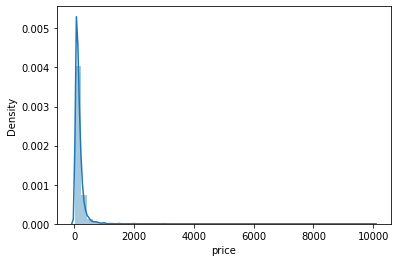

In [ ]:
sns.distplot(df.price)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


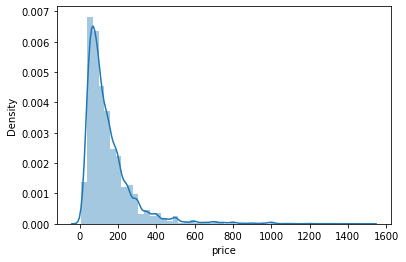

In [ ]:
sns.distplot(df[df.price<1500].price)
plt.show()

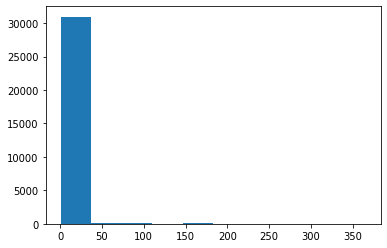

In [ ]:
plt.hist(df.minimum_nights)
plt.show()

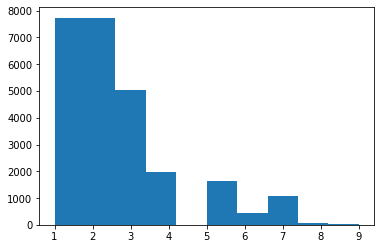

In [ ]:
plt.hist(df[df.minimum_nights<10].minimum_nights)
plt.show()

In [ ]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


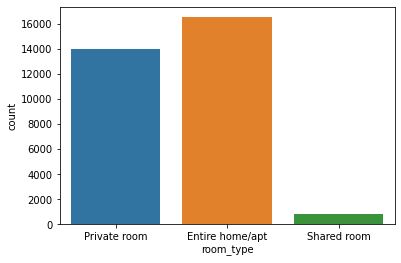

In [ ]:
sns.countplot(df.room_type)

In [ ]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


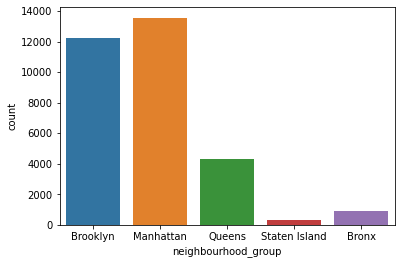

In [ ]:
sns.countplot(df.neighbourhood_group)

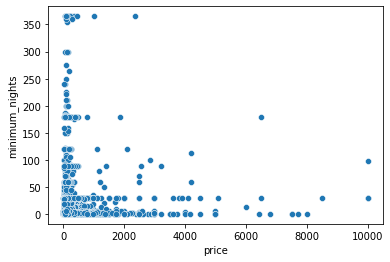

In [ ]:
sns.scatterplot(data=df, x='price', y='minimum_nights')

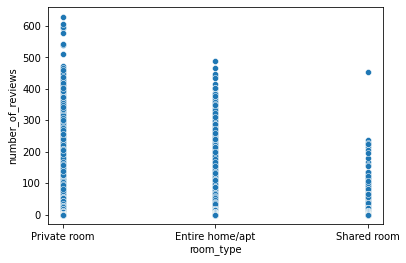

In [ ]:
sns.scatterplot(data=df, x='room_type', y='number_of_reviews')

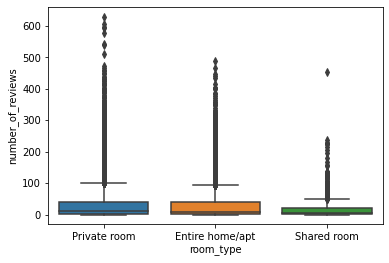

In [ ]:
sns.boxplot(data=df, x='room_type', y='number_of_reviews')

In [ ]:
df[['room_type', 'number_of_reviews']].groupby('room_type').sum()

,number_of_reviews
room_type,
Entire home/apt,512810
Private room,469171
Shared room,16519


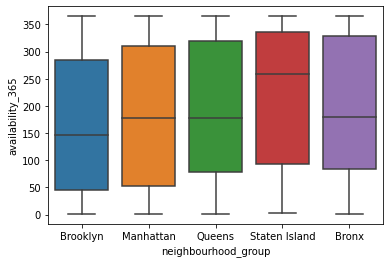

In [ ]:
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


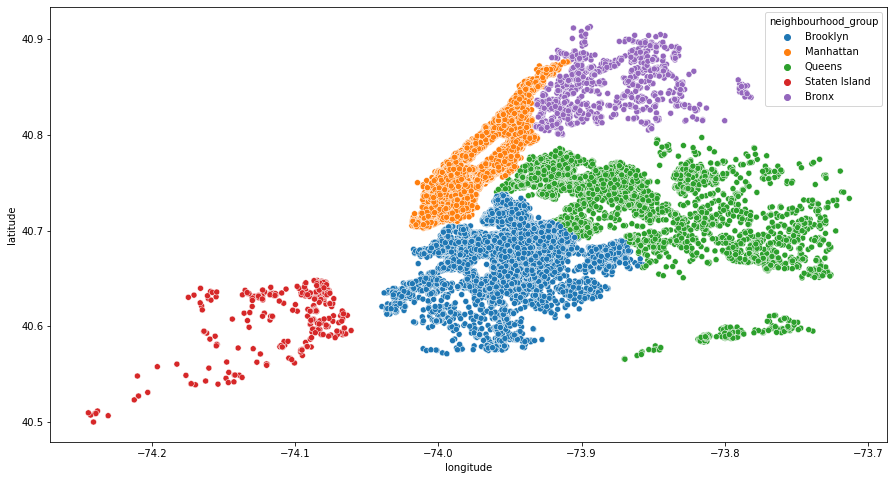

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df.longitude, df. latitude, hue=df.neighbourhood_group)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


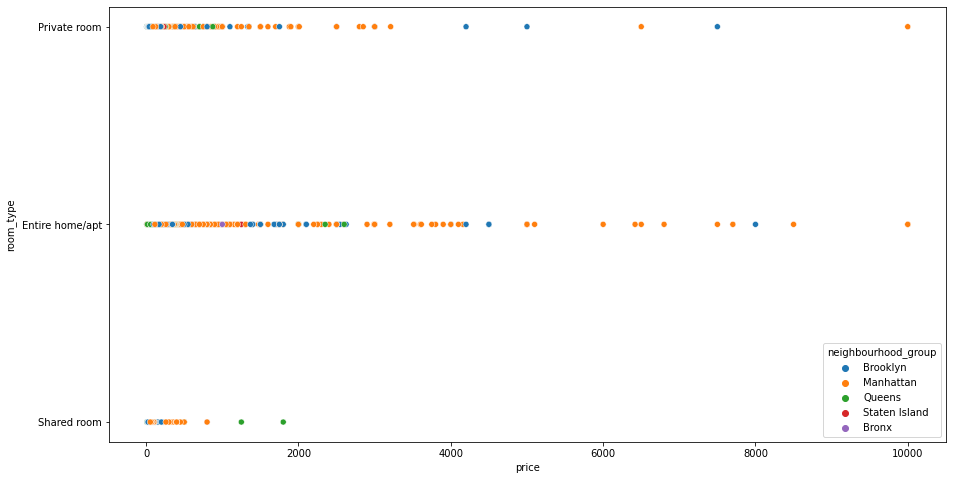

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df.price, df.room_type, hue=df.neighbourhood_group)

In [ ]:
# Covert category data to numeric value
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').cat.codes
df['neighbourhood'] = df['neighbourhood'].astype('category').cat.codes
df['room_type'] = df['room_type'].astype('category').cat.codes

In [ ]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,2,93,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,1,40,40.68514,-73.95976,0,89,1,270,4.64,1,194
5,Large Cozy 1 BR Apartment In Midtown East,7322,2,136,40.74767,-73.97500,0,200,3,74,0.59,1,129


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31337 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            31337 non-null  object 
 1   host_id                         31337 non-null  int64  
 2   neighbourhood_group             31337 non-null  int8   
 3   neighbourhood                   31337 non-null  int16  
 4   latitude                        31337 non-null  float64
 5   longitude                       31337 non-null  float64
 6   room_type                       31337 non-null  int8   
 7   price                           31337 non-null  int64  
 8   minimum_nights                  31337 non-null  int64  
 9   number_of_reviews               31337 non-null  int64  
 10  reviews_per_month               31337 non-null  float64
 11  calculated_host_listings_count  31337 non-null  int64  
 12  availability_365                

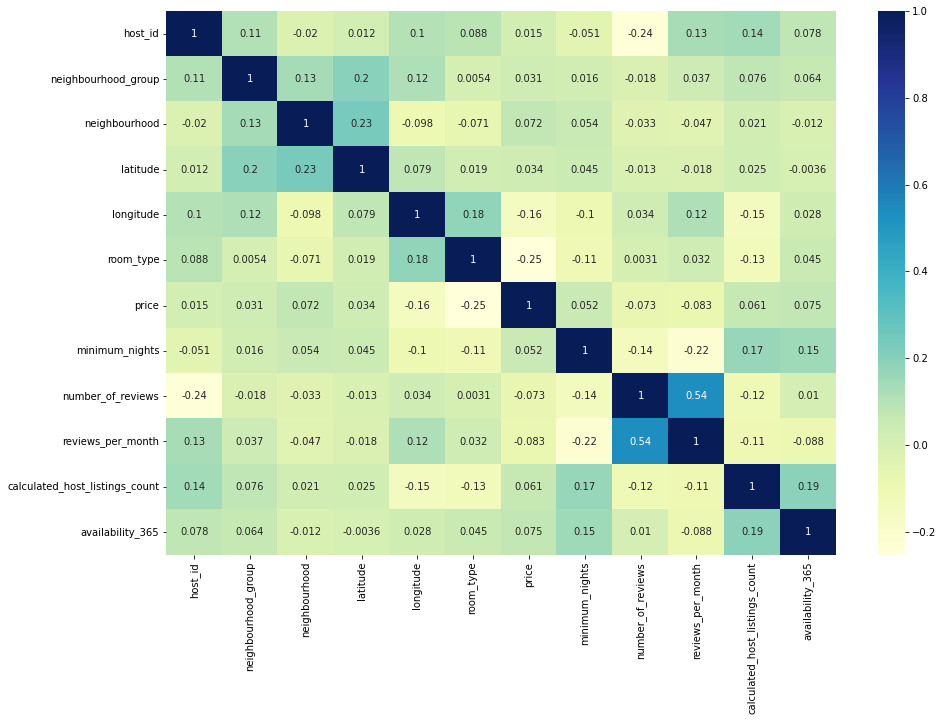

In [ ]:
plt.figure(figsize=(15, 10))
correlation = df.corr()
sns.heatmap(correlation, cmap='YlGnBu', annot=True)

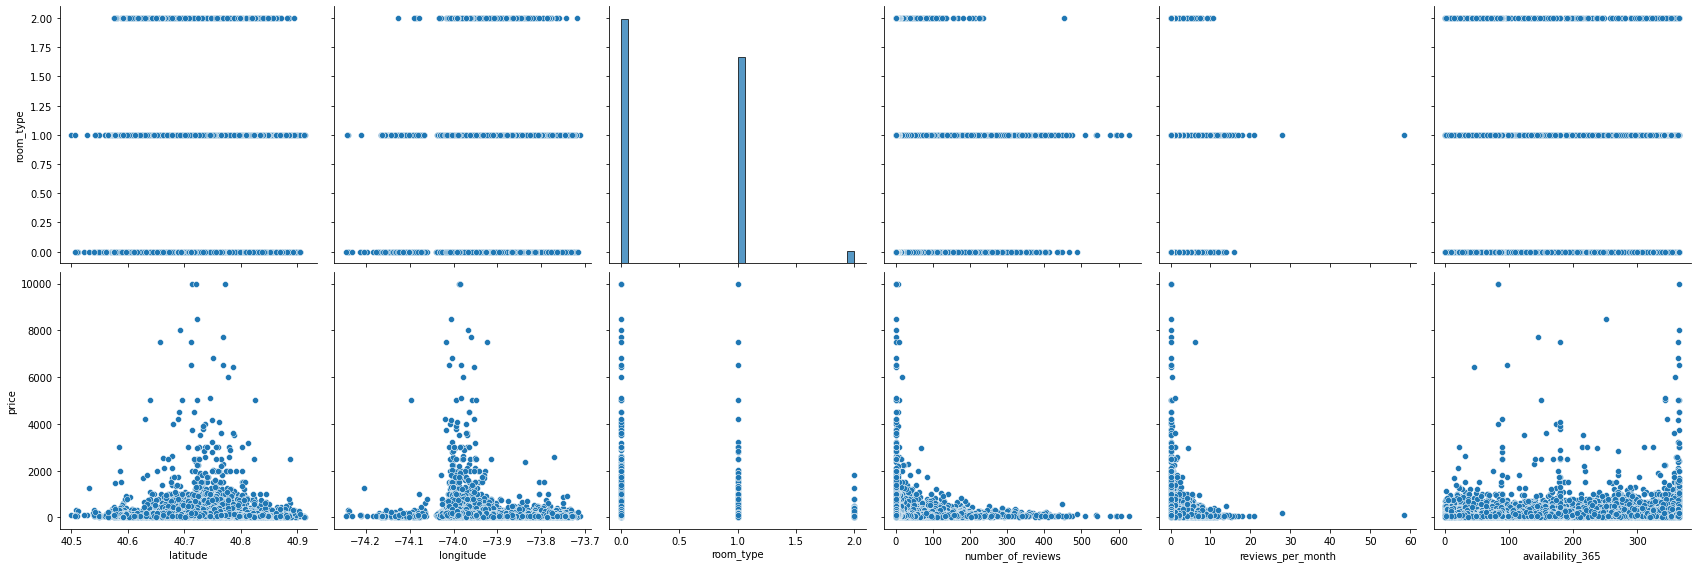

In [ ]:
y_axis = ['latitude','longitude', 'room_type','number_of_reviews', 'reviews_per_month', 'availability_365']
x_axis = ['room_type', 'price']
sns.pairplot(df, x_vars=y_axis, y_vars=x_axis, kind='scatter', height=4)

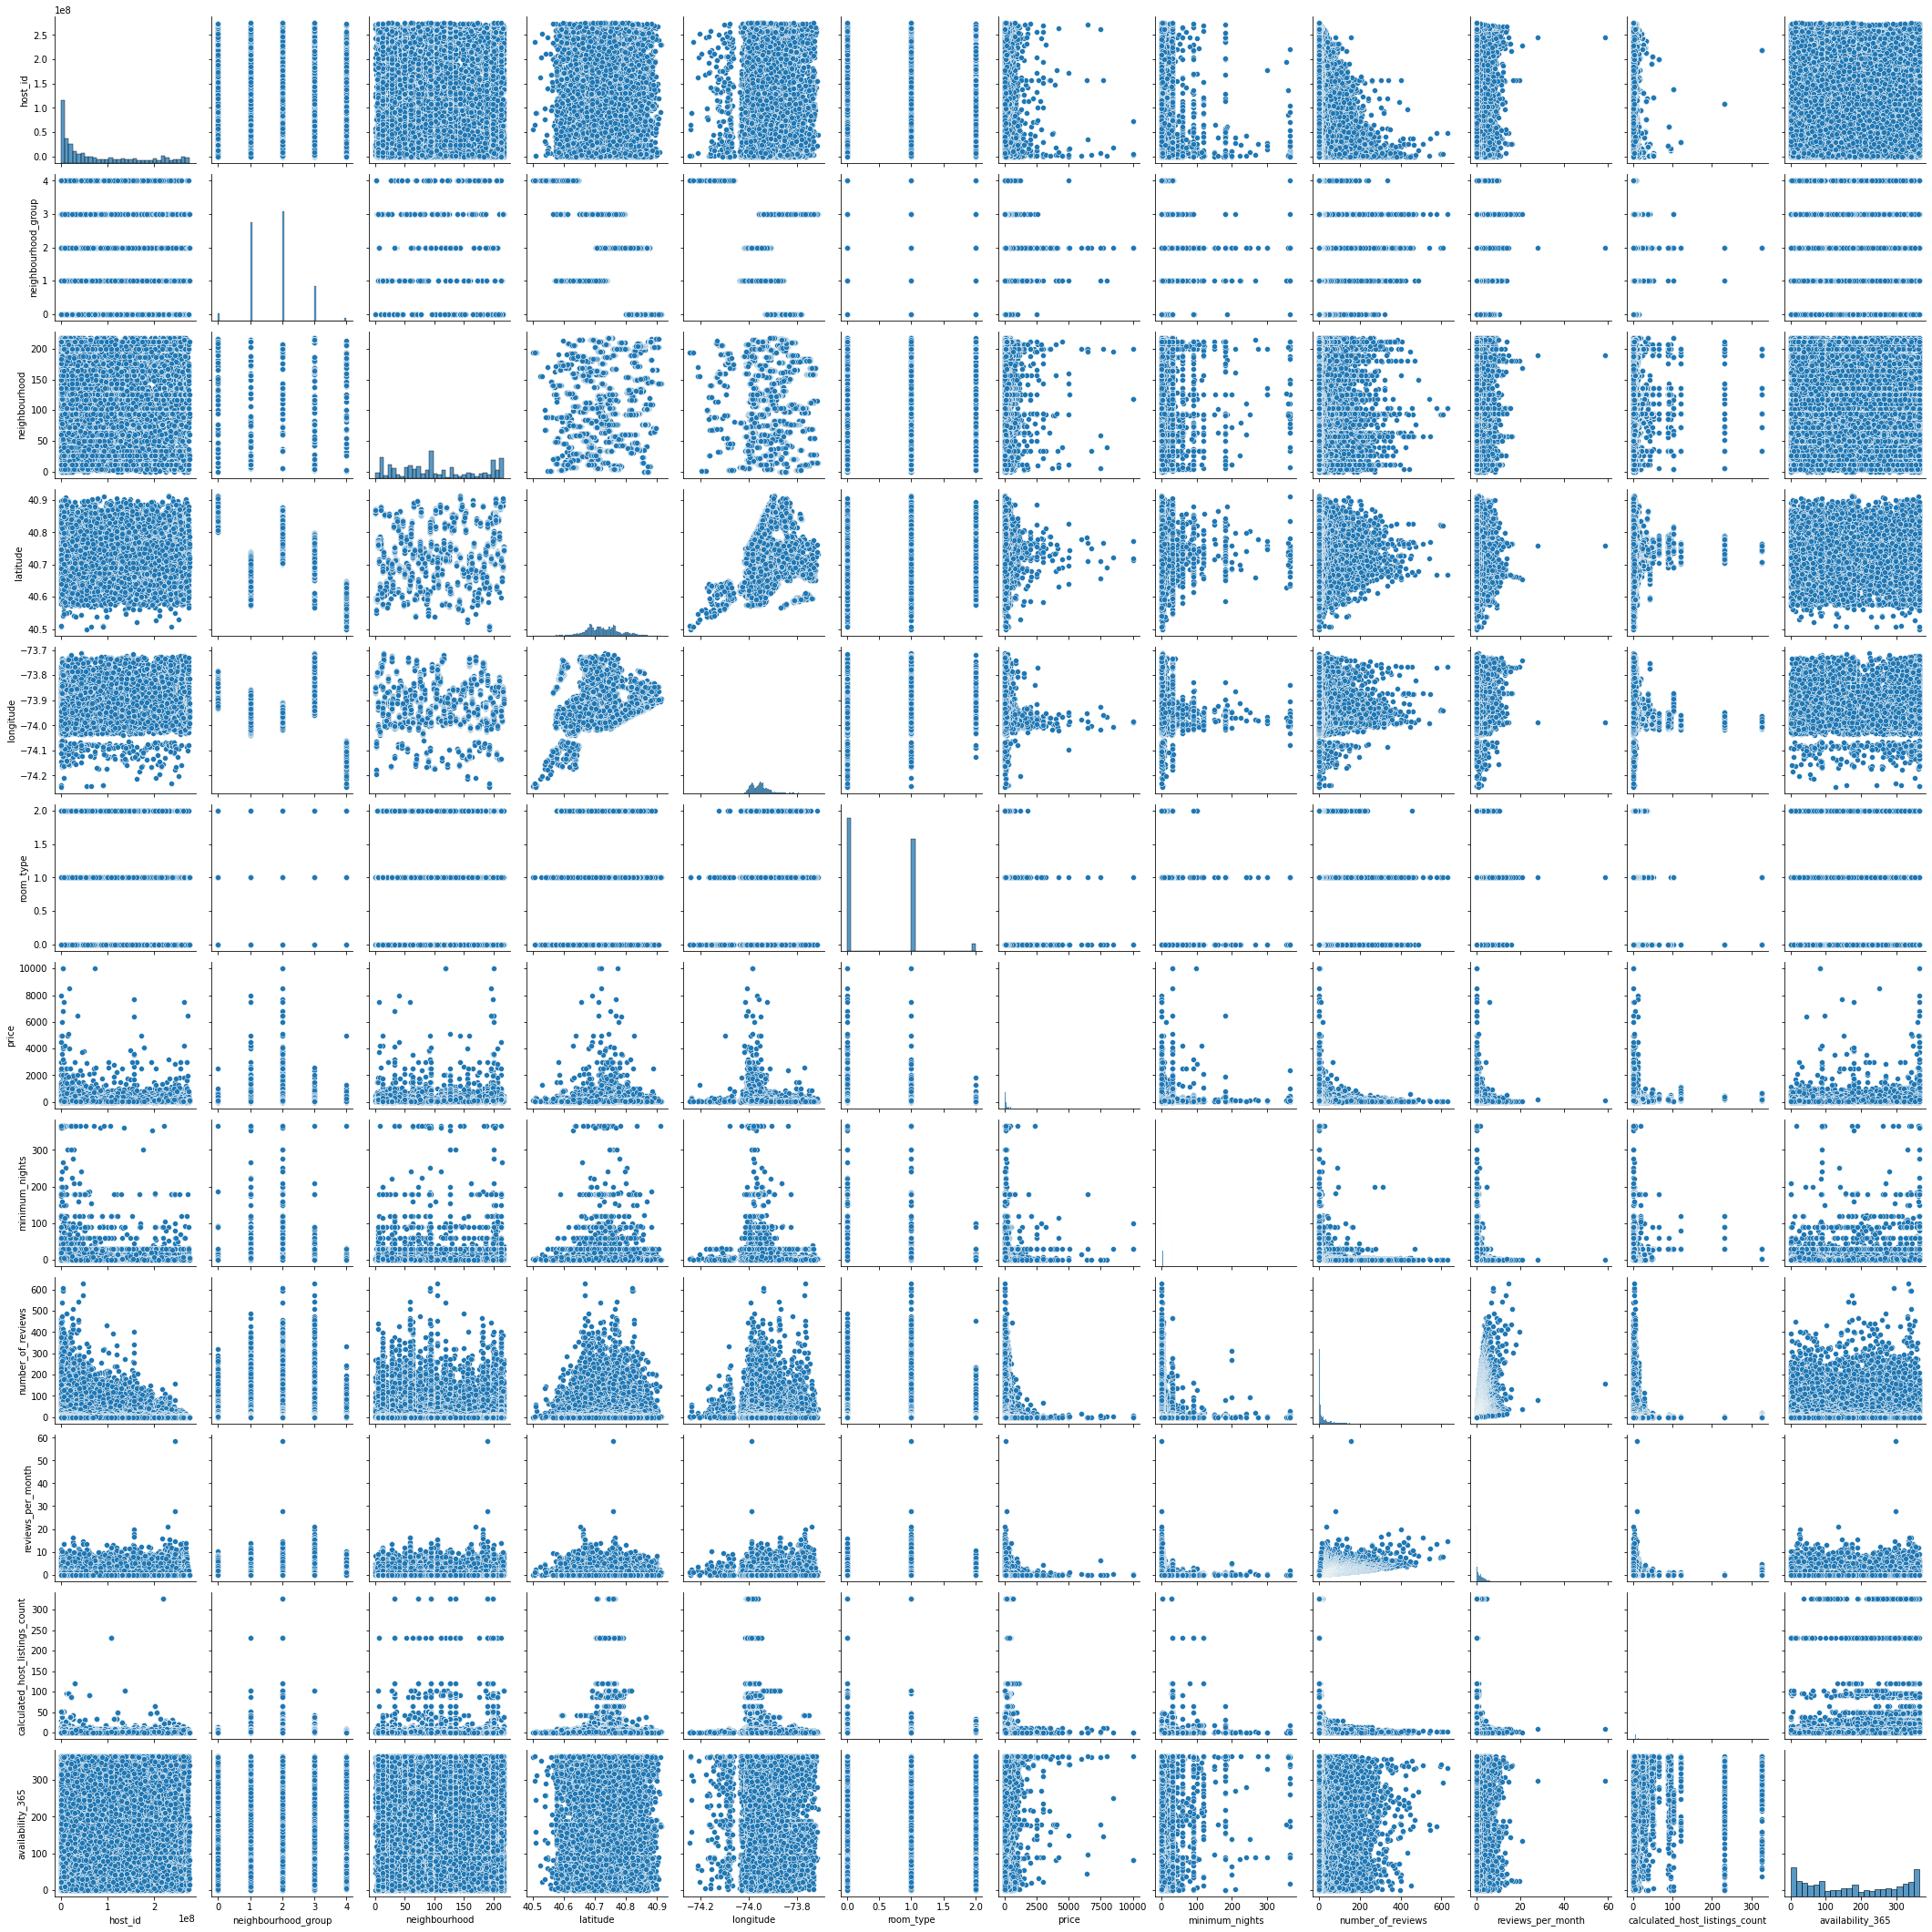

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,2,93,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,1,40,40.68514,-73.95976,0,89,1,270,4.64,1,194
5,Large Cozy 1 BR Apartment In Midtown East,7322,2,136,40.74767,-73.97500,0,200,3,74,0.59,1,129


In [ ]:
Y = df.iloc[:, 7]
columns = [3,5,9,11]
X=df.iloc[:, columns]
X.head()


,neighbourhood,longitude,number_of_reviews,calculated_host_listings_count
0,107,-73.97237,9,6
1,126,-73.98377,45,2
2,93,-73.94190,0,1
3,40,-73.95976,270,1
5,136,-73.97500,74,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X[1:5,1:5]

array([[-0.68127686,  0.25435207, -0.20484583],
       [ 0.13320319, -0.61693498, -0.22940661],
       [-0.21422011,  4.61078731, -0.22940661],
       [-0.51067762,  0.81584817, -0.22940661]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.047862156987874924
